<a href="https://colab.research.google.com/github/Ajaynsaa/CNS-CSA5172/blob/main/final_wine_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from warnings import filterwarnings
filterwarnings(action='ignore')

#loading dataset

In [4]:
wine = pd.read_csv("/content/winequality-red (1).csv")
wine.sample(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1264,8.5,0.370,0.32,1.8,0.066,26.0,51.0,0.99456,3.38,0.72,11.8,6
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6
1124,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,11.5,4
1031,7.3,0.550,0.01,1.8,0.093,9.0,15.0,0.99514,3.35,0.58,11.0,7
1377,5.2,0.490,0.26,2.3,0.090,23.0,74.0,0.99530,3.71,0.62,12.2,6
1546,7.0,0.570,0.02,2.0,0.072,17.0,26.0,0.99575,3.36,0.61,10.2,5
104,7.2,0.490,0.24,2.2,0.070,5.0,36.0,0.99600,3.33,0.48,9.4,5
1307,6.8,0.680,0.09,3.9,0.068,15.0,29.0,0.99524,3.41,0.52,11.1,4
1052,5.6,0.605,0.05,2.4,0.073,19.0,25.0,0.99258,3.56,0.55,12.9,5
1020,11.3,0.360,0.66,2.4,0.123,3.0,8.0,0.99642,3.20,0.53,11.9,6


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#description

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#finding null values

In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

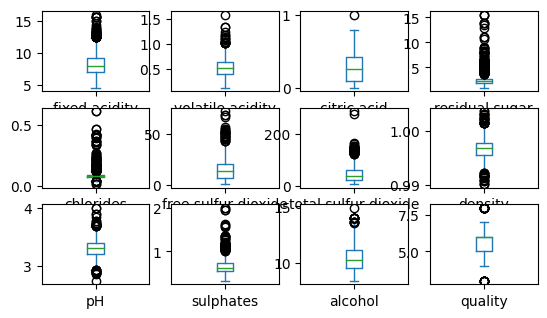

In [10]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

<Axes: >

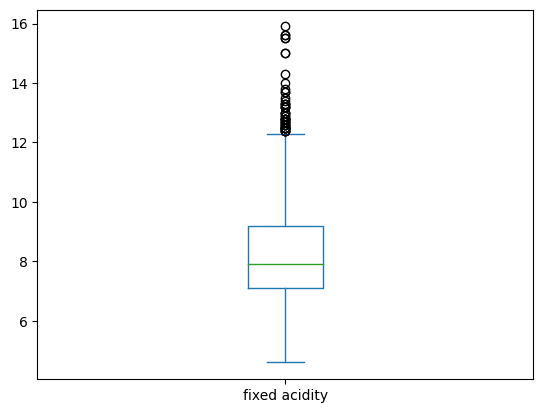

In [11]:
wine['fixed acidity'].plot(kind ='box')

#HISTOGRAMS

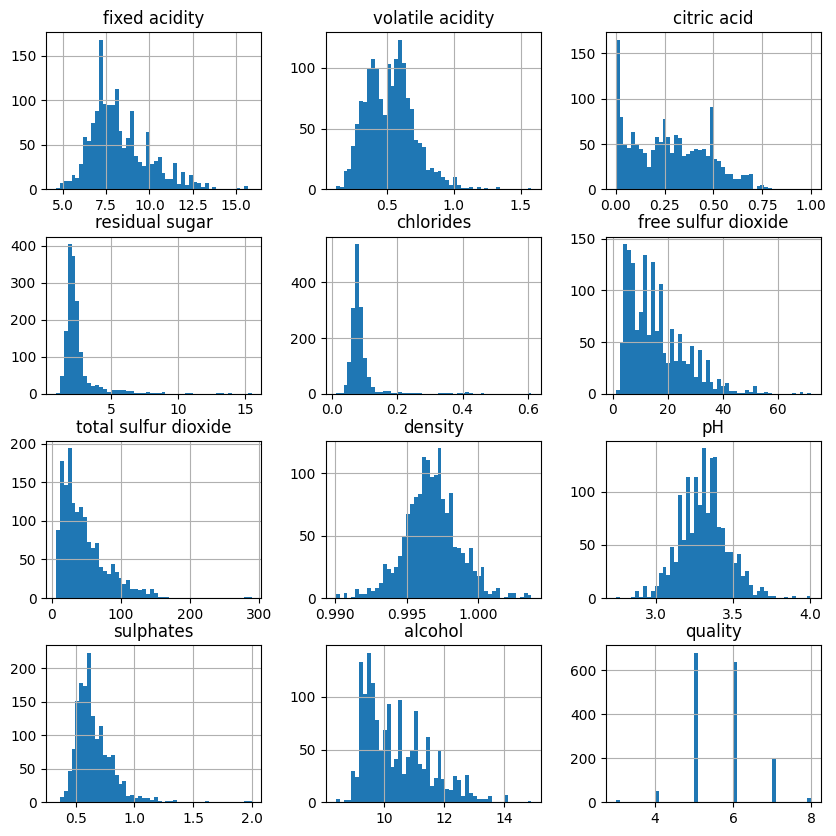

In [12]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

#Featureselection

In [13]:
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1501,7.8,0.820,0.29,4.3,0.083,21.0,64.0,0.99642,3.16,0.53,9.4,5
1178,5.6,0.915,0.00,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4,5
604,8.3,0.580,0.13,2.9,0.096,14.0,63.0,0.99840,3.17,0.62,9.1,6
304,8.4,0.650,0.60,2.1,0.112,12.0,90.0,0.99730,3.20,0.52,9.2,5
1245,7.4,0.550,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5,5


In [14]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [15]:
# If wine quality is 7 or above then will consider as good quality wine
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
923,6.8,0.41,0.31,8.8,0.084,26.0,45.0,0.99824,3.38,0.64,10.1,6,0
1214,10.2,0.33,0.46,1.9,0.081,6.0,9.0,0.99628,3.10,0.48,10.4,6,0
546,7.5,0.55,0.24,2.0,0.078,10.0,28.0,0.99830,3.45,0.78,9.5,6,0
606,9.4,0.41,0.48,4.6,0.072,10.0,20.0,0.99730,3.34,0.79,12.2,7,1
258,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5,0


In [16]:
# See total number of good vs bad wines samples
wine['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [18]:
# Separate depedent and indepedent variables
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [20]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [21]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


#Feature importance

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07414237 0.10697182 0.09481436 0.07205769 0.06709944 0.06993412
 0.08078185 0.08459709 0.06538785 0.11178611 0.17242731]


#Splitting dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

#result

In [24]:
model_res=pd.DataFrame(columns=['Model', 'Score'])

#Logisticregression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
# accuracy_score(Y_test,Y_pred)
model_res.loc[len(model_res)] = ['LogisticRegression', accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.86875


#USING KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ['KNeighborsClassifier', accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917


#USING SVC

In [27]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['SVC', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.86875


,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.868750


#USING DECISIONTREE:

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['DecisionTreeClassifier', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.8645833333333334


,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583


#USING GAUSSIAN NB:

In [29]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['GaussianNB', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.8333333333333334


,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.833333


#USING RANDOMFOREST:

In [30]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['RandomForestClassifier', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.89375


,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.833333
5,RandomForestClassifier,0.893750


#using Xgboost

In [ ]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['XGBClassifier', accuracy_score(Y_test,y_pred)]
model_res

In [36]:
model_res = model_res.sort_values(by='Score', ascending=False)
model_res

,Model,Score
5,RandomForestClassifier,0.893750
6,XGBClassifier,0.889583
1,KNeighborsClassifier,0.872917
0,LogisticRegression,0.868750
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.833333


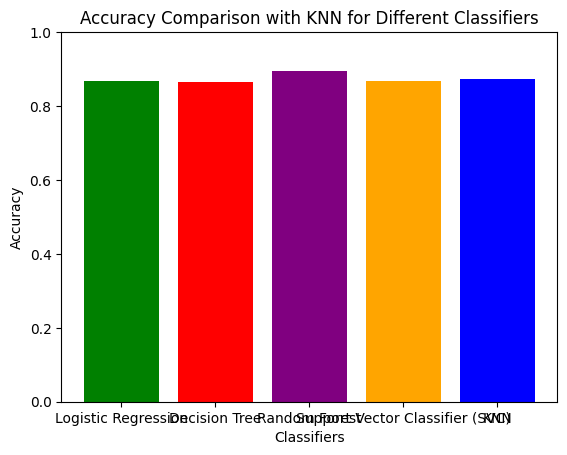

In [38]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier (SVC)', 'KNN']
accuracy_scores = [0.868750, 0.864583, 0.893750, 0.868750, 0.872917]  # Replace with your actual scores

# Set up the colors for each bar
colors = ['green', 'red', 'purple', 'orange', 'blue']

# Plotting the results
plt.bar(classifiers, accuracy_scores, color=colors)
plt.ylim(0, 1)
plt.title('Accuracy Comparison with KNN for Different Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.show()


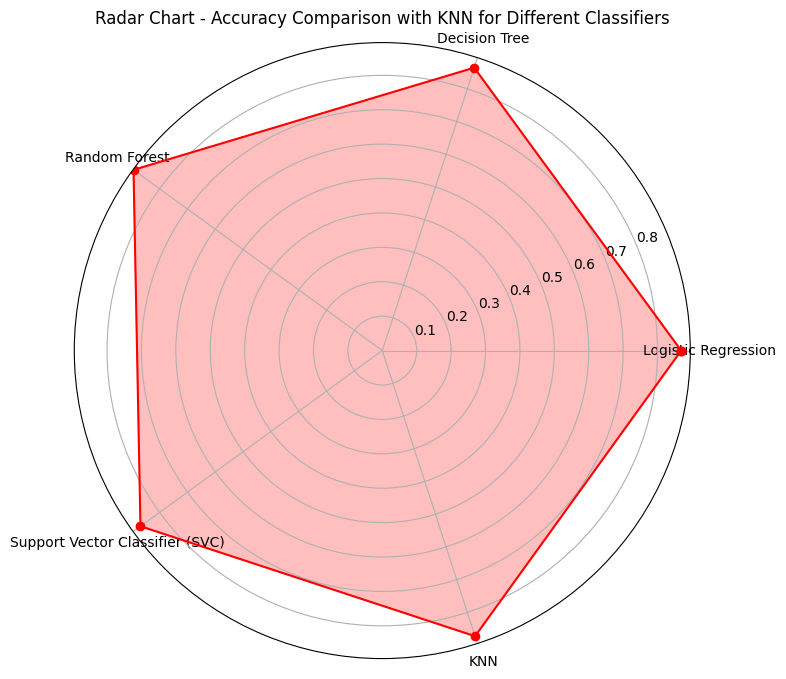

In [43]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier (SVC)', 'KNN']
accuracy_scores = [0.868750, 0.864583, 0.893750, 0.868750, 0.872917]  # Replace with your actual scores

# Number of classifiers
num_classifiers = len(classifiers)

# Set up angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_classifiers, endpoint=False).tolist()

# The plot is circular, so we need to "close the loop" and append the start element
accuracy_scores += [accuracy_scores[0]]
angles += [angles[0]]

# Plotting the radar chart
plt.figure(figsize=(8, 8))
plt.polar(angles, accuracy_scores, marker='o', color='r', linestyle='-')
plt.fill(angles, accuracy_scores, alpha=0.25, color='r')

# Adding labels
plt.thetagrids(np.degrees(angles[:-1]), classifiers)
plt.title('Radar Chart - Accuracy Comparison with KNN for Different Classifiers')

plt.show()


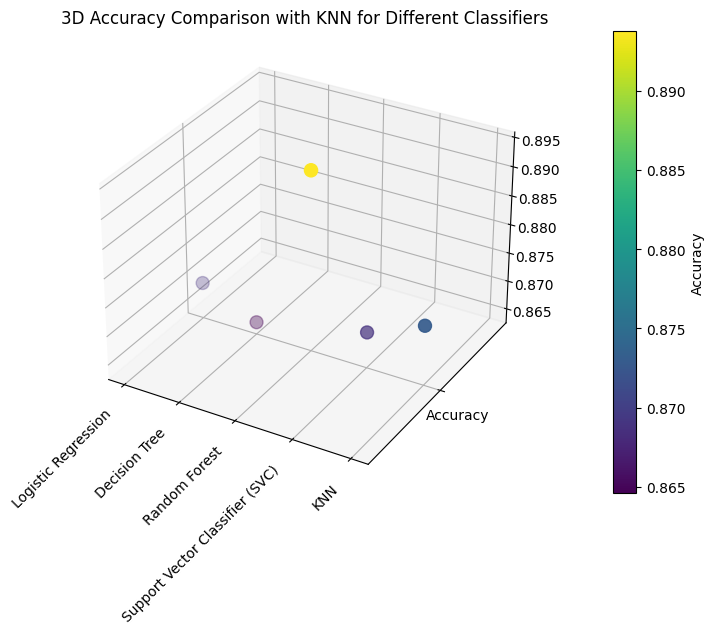

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier (SVC)', 'KNN']
accuracy_scores = [0.868750, 0.864583, 0.893750, 0.868750, 0.872917]  # Replace with your actual scores

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot with varying marker sizes
sc = ax.scatter(range(len(classifiers)), [0] * len(classifiers), accuracy_scores, s=np.array(accuracy_scores) * 100, c=accuracy_scores, cmap='viridis')

ax.set_yticks([0])
ax.set_yticklabels(['Accuracy'])
ax.set_xticks(range(len(classifiers)))
ax.set_xticklabels(classifiers, rotation=45, ha='right')

# Adding a colorbar
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Accuracy')

plt.title('3D Accuracy Comparison with KNN for Different Classifiers')
plt.show()
